In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting display
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 127)
pd.set_option('display.max_rows', 100)

In [3]:
# Loading in data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Covid Data.csv')

import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

#EDA and Data Cleaning

##EDA

In [4]:
# General dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
data.shape

(1048575, 21)

In [6]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [7]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [8]:
# Setting all feature names to lower case
data.columns = [x.lower() for x in data.columns]

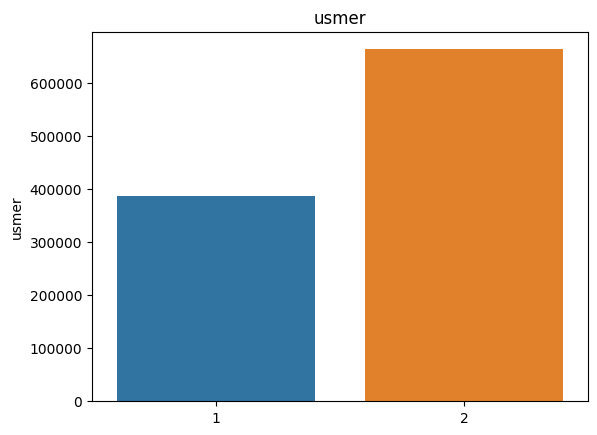

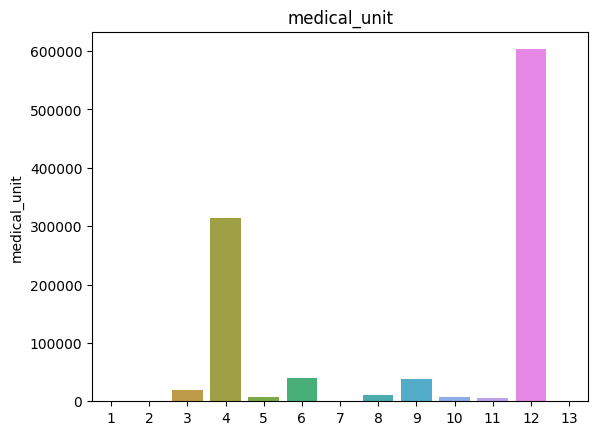

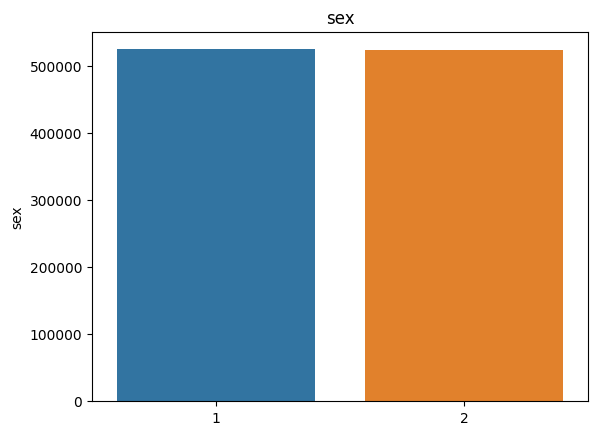

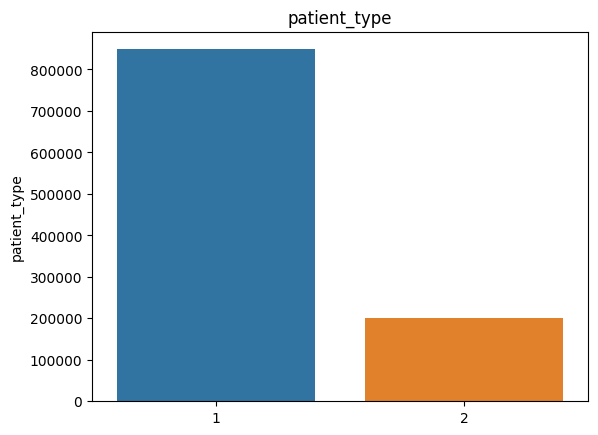

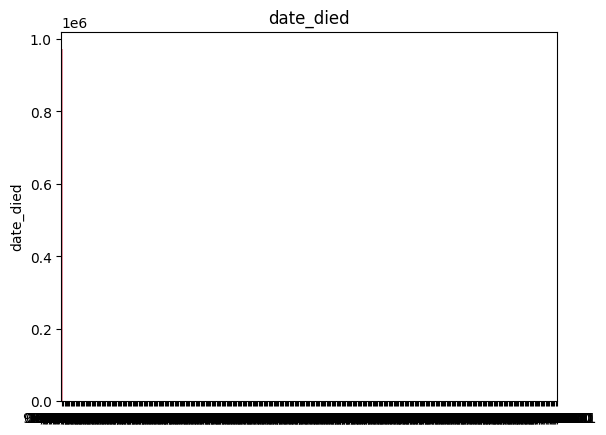

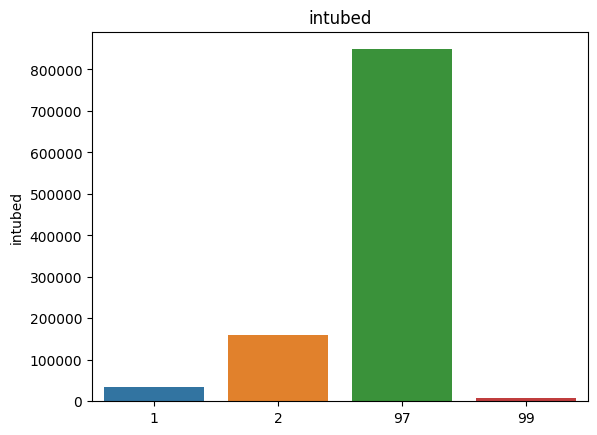

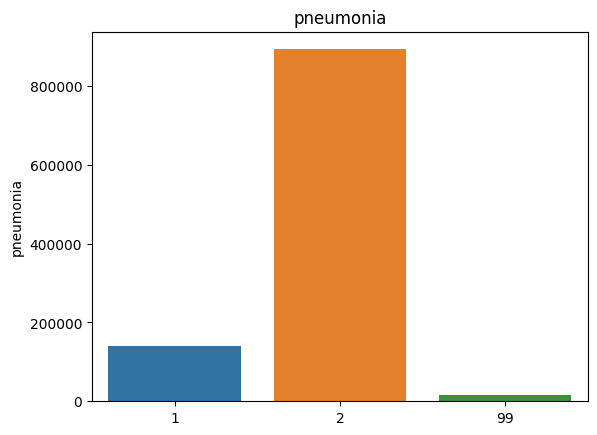

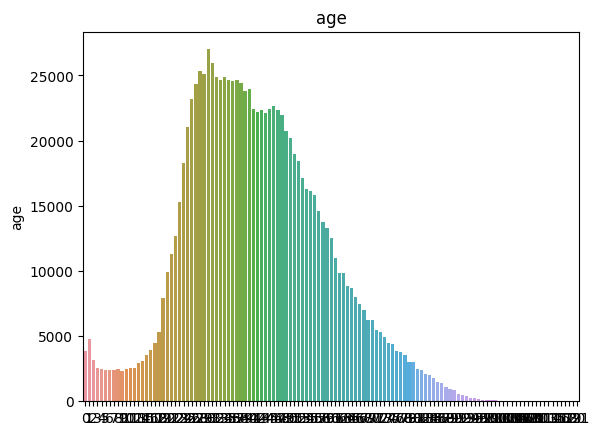

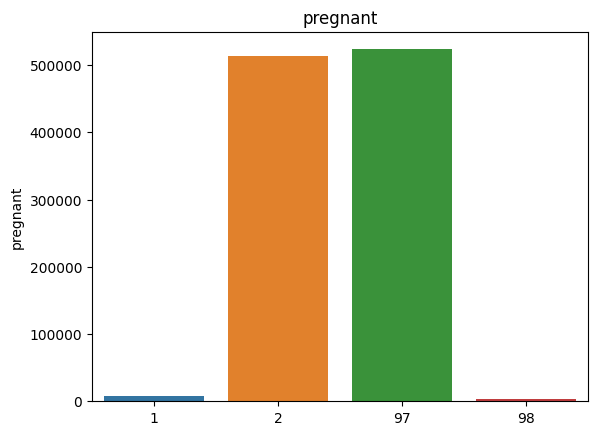

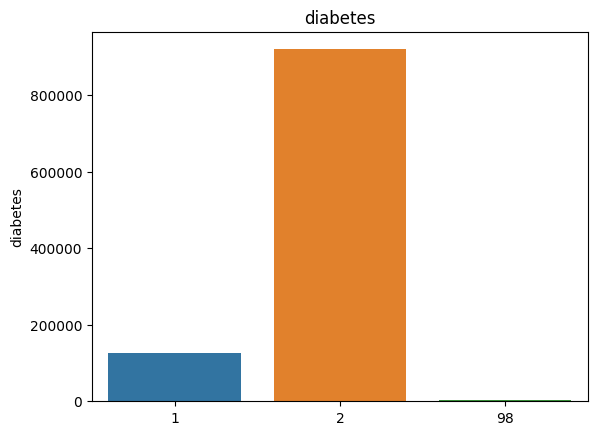

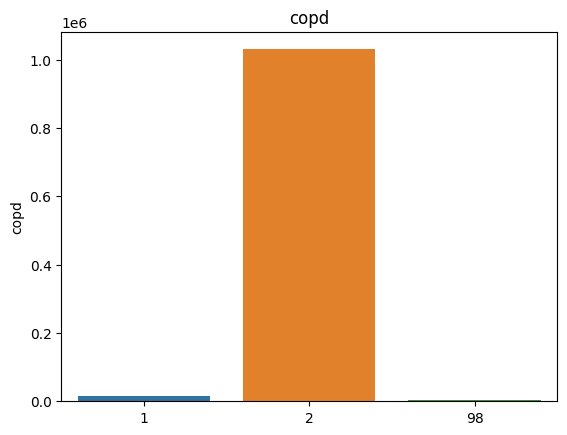

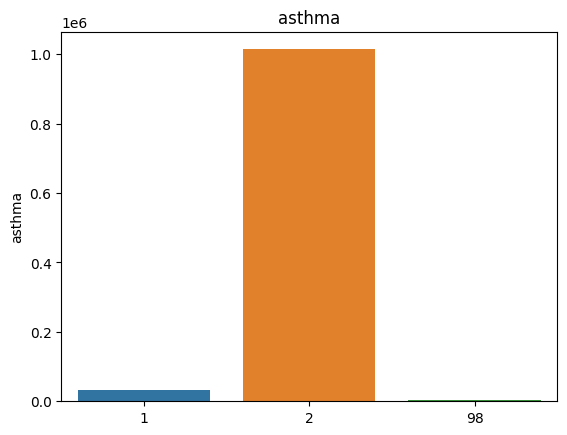

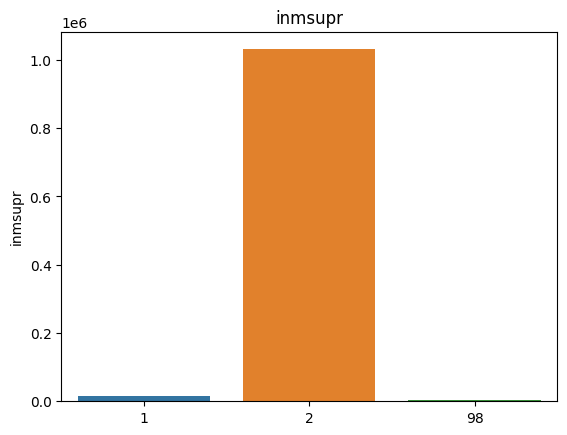

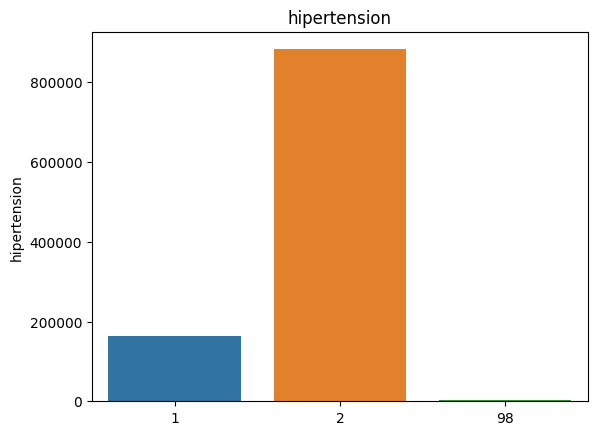

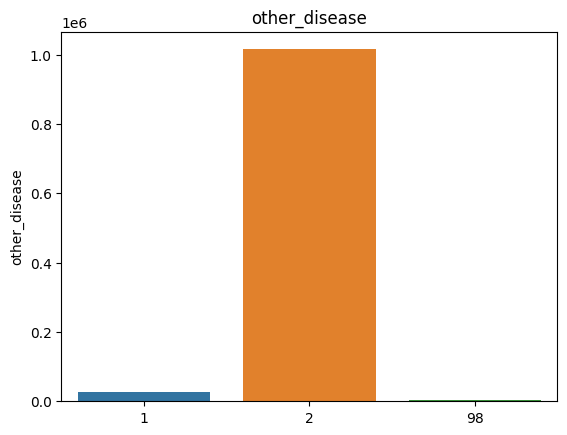

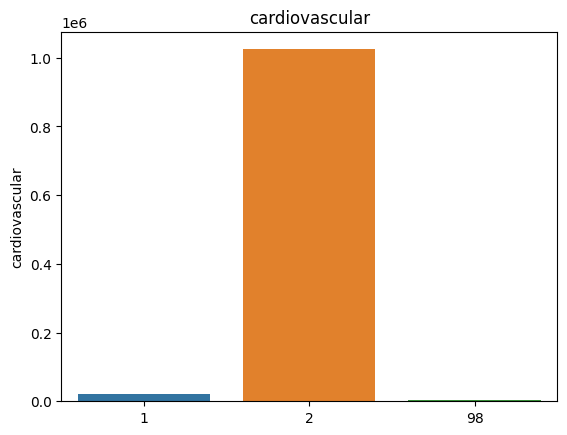

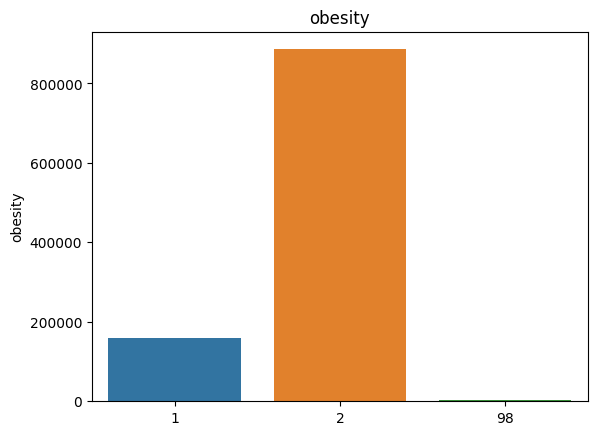

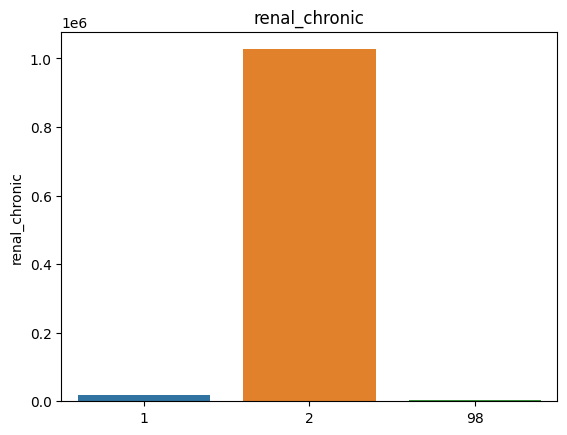

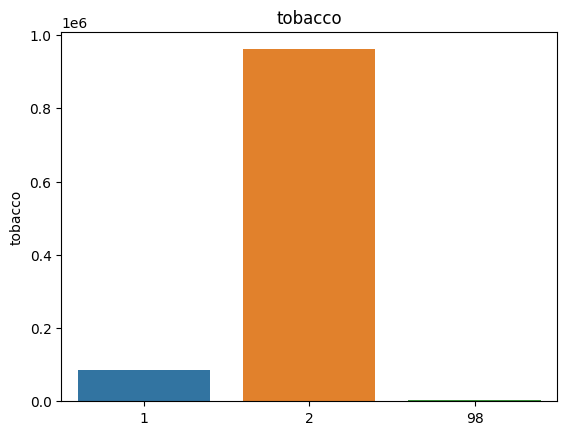

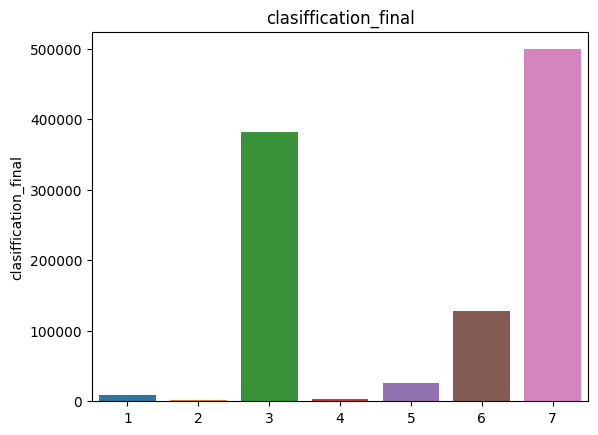

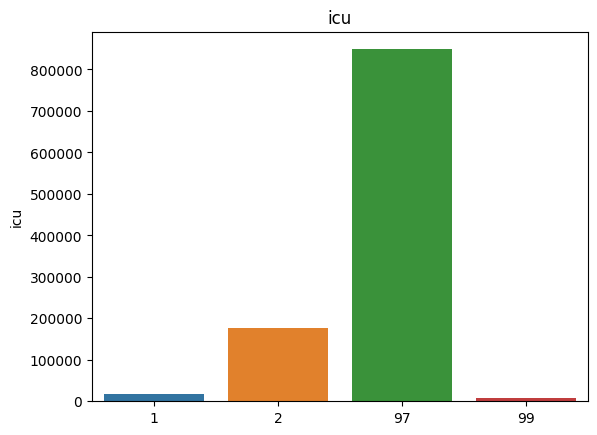

In [9]:
# Examining counts for each feature (all categorical)
for x in data.columns:
  sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts()).set_title(x)
  plt.show()

##Pregnant

In [10]:
# Seeing what the sex was for people who had '97' as the entry in pregnant
null_pregnant = data[data['pregnant']==97]
null_pregnant['sex'].value_counts()

2    523511
Name: sex, dtype: int64

In [11]:
# All of them were males, changing the '97' entries to '2' for non-pregnant
data.loc[data['pregnant']==97, 'pregnant'] = 2

##Age

In [12]:
# Creating bins for age groups
bins = [0, 3, 13, 20, 40, 60, 80, 100]
data['age_bins'] = pd.cut(data['age'], bins)

In [13]:
# Checking how many in each age group
data['age_bins'].value_counts()

(20, 40]     449919
(40, 60]     376676
(60, 80]     125088
(13, 20]      38212
(3, 13]       24995
(80, 100]     19146
(0, 3]        10539
Name: age_bins, dtype: int64

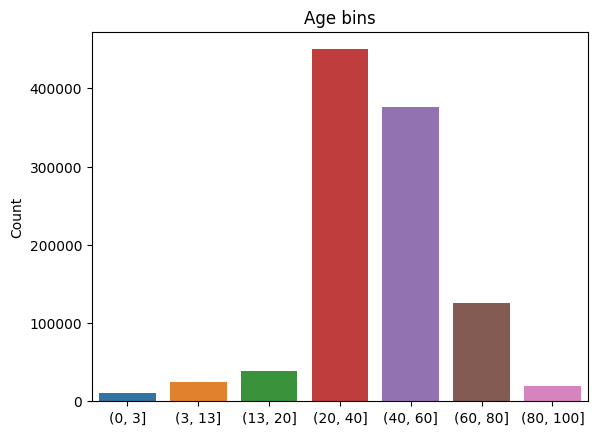

In [14]:
# Visualizing amount in each age group
sns.barplot(x=data['age_bins'].value_counts().index, y=data['age_bins'].value_counts()).set_title("Age bins")
plt.ylabel('Count')
plt.show()

##Covid Positive

In [15]:
# Creating feature for if a patient had covid
data['covid_pos']=0

# Setting those who had covid to 1
data.loc[data['clasiffication_final'] <= 3, 'covid_pos'] = 1
# Setting those who did not have covid or an inconclusive test to 0
data.loc[data['clasiffication_final'] >= 4, 'covid_pos'] = 0

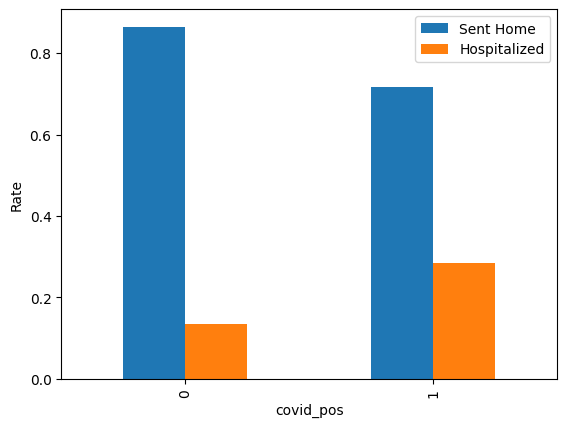

In [16]:
# Visualizing hospitilization rate of those with and without covid
table = pd.crosstab(data['covid_pos'], data.patient_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)

# Labels
legend = ['Sent Home', 'Hospitalized']
plt.legend(labels=legend)
plt.ylabel("Rate")

plt.show()

In [17]:
# Reducing dataset to only patients with Covid, only trying to predict what patients with Covid would be hospitalized
data = data.loc[data['covid_pos']==1]

data.shape

(391979, 23)

##Nulls

In [18]:
# Choosing features that had to do with pre-existing conditions
feats = ['sex', 'pneumonia', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension', 'other_disease', 'cardiovascular',
         'obesity', 'renal_chronic', 'tobacco']

# Removing data where there was missing data (values 97 or greater)
for x in feats:
    data = data[data[x]<97]

# Adding age groups to features
feats.append('age_bins')

##Examining Outcomes

In [19]:
# Changing number entries to 'F' or 'M' it more clear if patient was female or male
data['sex'].loc[data['sex']==1]='F'
data['sex'].loc[data['sex']==2]='M'

# Changing binaries to 'Y' or 'N' to make it more clear if patient had a condition or not
conditions = ['pneumonia', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension', 'other_disease', 'cardiovascular', 'obesity',
              'renal_chronic', 'tobacco']
for x in conditions:
  data[x].loc[data[x]==1]='Y'
  data[x].loc[data[x]==2]='N'

<ipython-input-19-ce5364c544e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'].loc[data['sex']==1]='F'
<ipython-input-19-ce5364c544e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'].loc[data['sex']==2]='M'
<ipython-input-19-ce5364c544e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x].loc[data[x]==1]='Y'


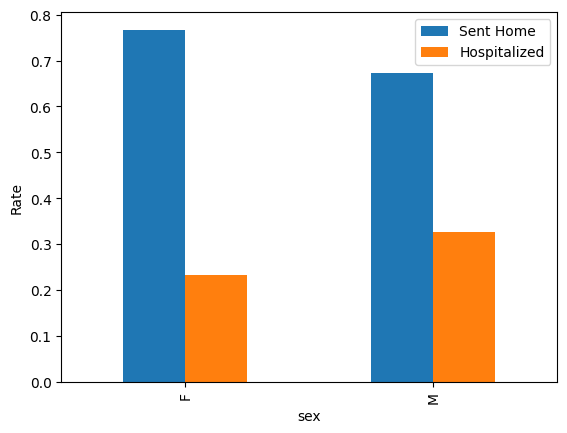

Hospitalization rate of left column: 0.2329
Hospitalization rate of right column: 0.3263
****************************************************************************************************


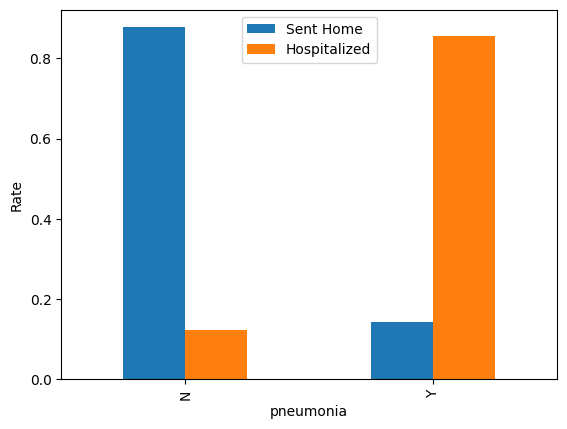

Hospitalization rate of left column: 0.1225
Hospitalization rate of right column: 0.8568
****************************************************************************************************


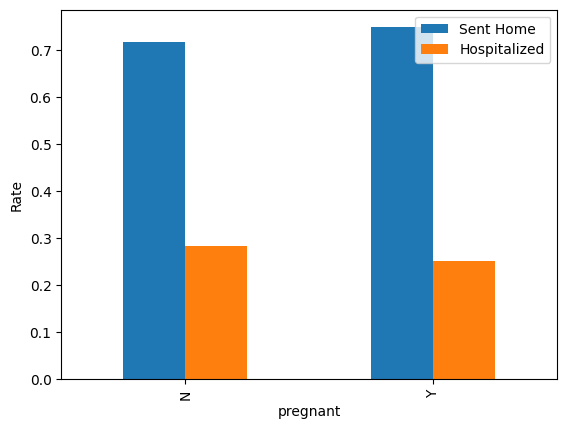

Hospitalization rate of left column: 0.2831
Hospitalization rate of right column: 0.2515
****************************************************************************************************


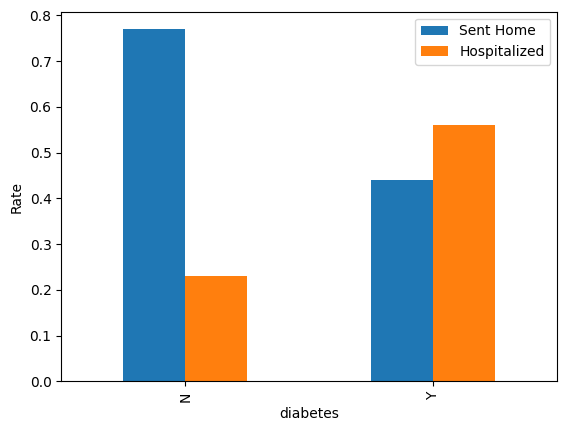

Hospitalization rate of left column: 0.2305
Hospitalization rate of right column: 0.5605
****************************************************************************************************


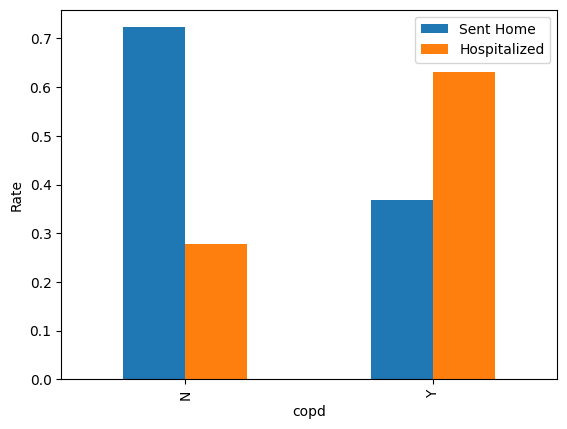

Hospitalization rate of left column: 0.2774
Hospitalization rate of right column: 0.6312
****************************************************************************************************


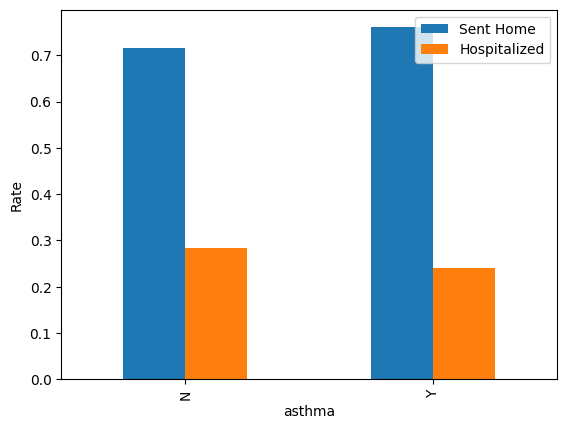

Hospitalization rate of left column: 0.2841
Hospitalization rate of right column: 0.2395
****************************************************************************************************


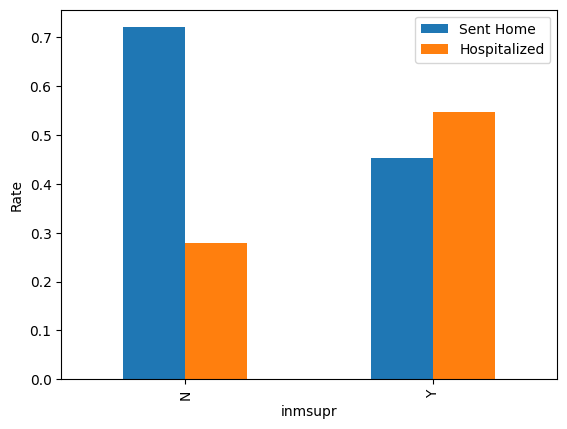

Hospitalization rate of left column: 0.2796
Hospitalization rate of right column: 0.5478
****************************************************************************************************


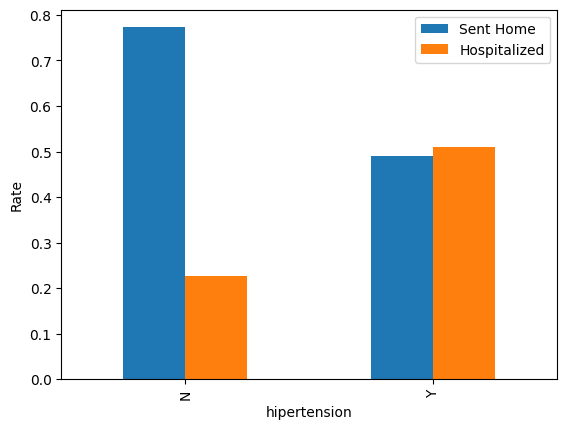

Hospitalization rate of left column: 0.2274
Hospitalization rate of right column: 0.5102
****************************************************************************************************


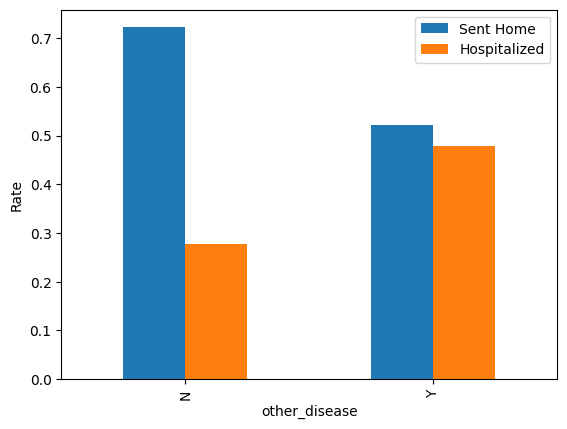

Hospitalization rate of left column: 0.2778
Hospitalization rate of right column: 0.4785
****************************************************************************************************


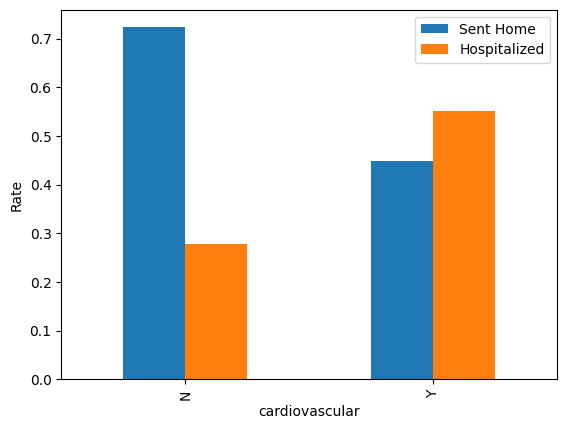

Hospitalization rate of left column: 0.277
Hospitalization rate of right column: 0.5506
****************************************************************************************************


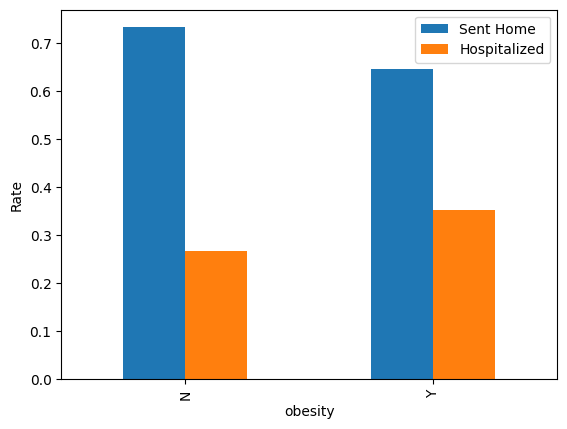

Hospitalization rate of left column: 0.2669
Hospitalization rate of right column: 0.3531
****************************************************************************************************


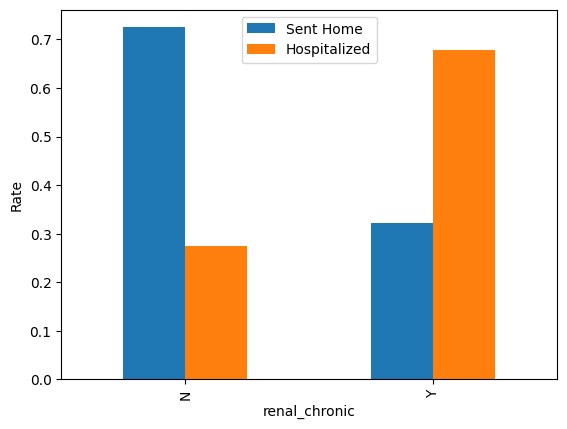

Hospitalization rate of left column: 0.2747
Hospitalization rate of right column: 0.6778
****************************************************************************************************


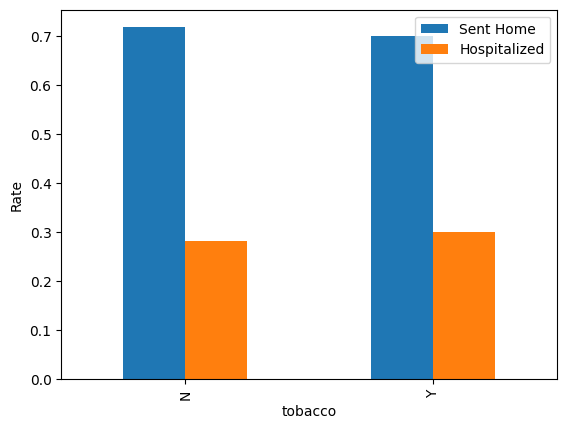

Hospitalization rate of left column: 0.2816
Hospitalization rate of right column: 0.2998
****************************************************************************************************


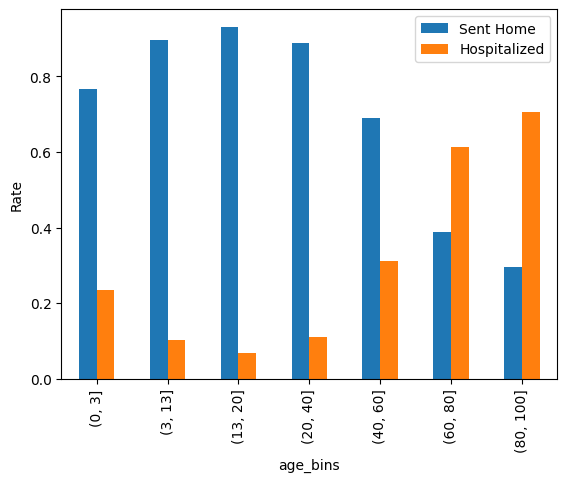

Hospitalization rate of left column: 0.2347
Hospitalization rate of right column: 0.103
****************************************************************************************************


In [20]:
# Visualizing hospitalization rate for each condition
for x in feats:
  table = pd.crosstab(data[x], data.patient_type)
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)

  # Labels
  plt.legend(labels=legend)
  plt.ylabel("Rate")
  plt.show()

  # Hospitalization rates
  print('Hospitalization rate of left column: ' + str(round(table.iloc[0,1]/(table.iloc[0,1]+table.iloc[0,0]), 4)))
  print('Hospitalization rate of right column: ' + str(round(table.iloc[1,1]/(table.iloc[1,1]+table.iloc[1,0]), 4)))
  print('*'*100)

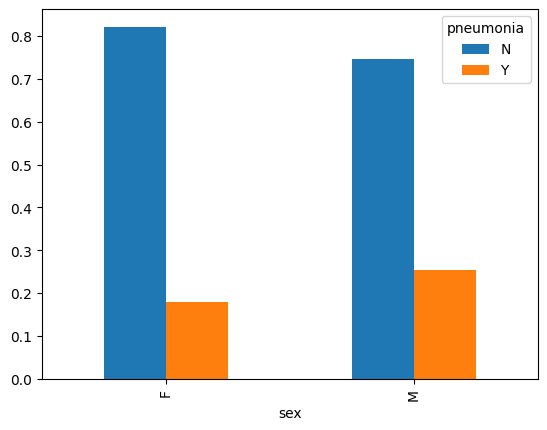

Pneumonia rate in females: 0.1782
Pneumonia rate in males: 0.2533


In [21]:
# Males slightly more likely to be hospitalized, pneumonia patients way more likely to be hospitalized, seeing if condition is more common in males
table = pd.crosstab(data['sex'], data.pneumonia)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.show()

# Pneumonia rates
print('Pneumonia rate in females: ' + str(round(table.iloc[0,1]/(table.iloc[0,1]+table.iloc[0,0]), 4)))
print('Pneumonia rate in males: ' + str(round(table.iloc[1,1]/(table.iloc[1,1]+table.iloc[1,0]), 4)))

##Dummies

In [22]:
# Making a copy of dataset
processed_data = data.copy()

In [23]:
# Defining function to create dummy variables
def create_dummies(df, column_name):
    # Creating dummies
    dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=True)
    # Concatenating dummies to dataframe
    df = pd.concat([df, dummies], axis=1)
    # Dropping original columns
    df = df.drop(columns=column_name)
    return df

In [24]:
# Temporarily adding patient type to features to create dummy variable for it
feats.append('patient_type')

# Iterating through features to create dummies
for x in feats:
  processed_data = create_dummies(processed_data, x)

# Removing patient type from features
feats.remove('patient_type')

# Renaming features to be more clear/consistent
processed_data = processed_data.rename(columns={'patient_type_2':'hospitalized', 'age_bins_(3, 13]':'age_bins_(3, 13)',
                                                'age_bins_(13, 20]':'age_bins_(13, 20)', 'age_bins_(20, 40]':'age_bins_(20, 40)',
                                                'age_bins_(40, 60]':'age_bins_(40, 60)', 'age_bins_(60, 80]':'age_bins_(60, 80)',
                                                'age_bins_(80, 100]':'age_bins_(80, 100)'})

In [25]:
# Initializing feature for baby age group
processed_data['age_bins_(0, 3)']=0

# Creating mask that finds those who aren't in any current age group
mask = (processed_data['age_bins_(3, 13)'] == 0) & (processed_data['age_bins_(80, 100)'] == 0) & (processed_data['age_bins_(13, 20)'] == 0) & (processed_data['age_bins_(20, 40)'] == 0) & (processed_data['age_bins_(40, 60)'] == 0) & (processed_data['age_bins_(60, 80)'] == 0)

# Setting those who aren't currently in an age group to be in the baby age group
processed_data.loc[mask, 'age_bins_(0, 3)'] = 1

In [26]:
# Creating feature set
processed_feats = ['sex_M',	'pneumonia_Y',	'pregnant_Y',	'diabetes_Y',	'copd_Y',	'asthma_Y',	'inmsupr_Y',	'hipertension_Y',
                   'other_disease_Y',	'cardiovascular_Y',	'obesity_Y',	'renal_chronic_Y',	'tobacco_Y',	'age_bins_(0, 3)', 'age_bins_(3, 13)',
                   'age_bins_(13, 20)',	'age_bins_(20, 40)',	'age_bins_(40, 60)',	'age_bins_(60, 80)',	'age_bins_(80, 100)', 'hospitalized']

# Setting dataframe to contain relevant features
processed_data = processed_data[processed_feats]

# Removing target variable from features
processed_feats.remove('hospitalized')

#Model Building

##Baseline Model

In [27]:
from sklearn.metrics import log_loss

In [28]:
## Function to calculate baseline log loss based on guessing from the class ratio
## Function obtained from https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d
def calculate_log_loss(class_ratio,multi=10000):

    if sum(class_ratio)!=1.0:
        print("warning: Sum of ratios should be 1 for best results")
        class_ratio[-1]+=1-sum(class_ratio)  # add the residual to last class's ratio

    actuals=[]
    for i,val in enumerate(class_ratio):
        actuals=actuals+[i for x in range(int(val*multi))]


    preds=[]
    for i in range(multi):
        preds+=[class_ratio]

    return (log_loss(actuals, preds))

In [29]:
# Getting ratios
processed_data['hospitalized'].value_counts()

0    277940
1    109656
Name: hospitalized, dtype: int64

In [30]:
print(277940/(277940+109656))
print(109656/(109656+277940))

0.7170868636415236
0.28291313635847637


In [31]:
# Calculating baseline log loss
calculate_log_loss([0.72,0.28])

0.5929533174474746

##Initial Models

In [ ]:
# Installing models
!pip install catboost
!pip install lightgbm==2.2.3

In [33]:
# Importing packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.model_selection import cross_val_score

In [ ]:
# Initializing models
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Catboost', 'LightGBM']
models = [LogisticRegression(), RandomForestClassifier(), XGBClassifier(), CatBoostClassifier(verbose=False),
          lgb.LGBMClassifier()]

# Looping through models and seeing initial log loss scores with default parameters
for model, name in zip(models, model_names):
    print(name + ' log loss: ' +
          str(cross_val_score(model, processed_data[processed_feats], processed_data['hospitalized'], cv=5, scoring='neg_log_loss').mean()))

Logistic Regression log loss: -0.34763423853913605
Random Forest log loss: -0.37140379291001047
XGBoost log loss: -0.3455973890888216
Catboost log loss: -0.346888418713471
LightGBM log loss: -0.34476332984094393


##LightGBM

In [ ]:
# Importing packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Initializing LGBM model
lgbm = lgb.LGBMClassifier()

# Creating parameter grid for random grid search
rnd_param_grid = {'num_leaves':[10, 20, 31, 50, 100],
              'min_child_samples':[1, 10, 20, 30, 50],
              'max_depth':[-1, 5, 10, 20],
              'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
              'reg_alpha':[0, 0.01, 0.05, 0.1],
              'n_iter':[50, 75, 100, 200, 500]}

# Creating randomized grid search
rnd_lgbm = RandomizedSearchCV(lgbm, param_distributions = rnd_param_grid, n_iter = 300, cv = 3, verbose = True, n_jobs = -1,
                              scoring='neg_log_loss')
# Fitting randomized grid search
rnd_lgbm.fit(processed_data[processed_feats], processed_data['hospitalized'])

# Printing best parameters from randomized grid search
print(rnd_lgbm.best_params_)

In [ ]:
# Creating new parameter grid from randomized grid search parameters
param_grid = {'reg_alpha': [0, 0.01],
              'num_leaves': [100, 150, 200],
              'n_iter': [60, 75, 90],
              'min_child_samples': [1, 5],
              'max_depth': [5, 10, 15],
              'learning_rate': [0.02, 0.05, 0.07]}

# Creating grid search
grid_lgbm = GridSearchCV(lgbm, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1, scoring='neg_log_loss')
# Fitting grid search
grid_lgbm.fit(processed_data[processed_feats], processed_data['hospitalized'])

# Printing best parameters from grid search
print(grid_lgbm.best_params_)

In [34]:
# Creating LGBM model with tuned hyperparameters
lgbm = lgb.LGBMClassifier(learning_rate=0.05, max_depth=15, min_child_samples=5, n_iter=75, num_leaves=100, reg_alpha=0.01)

# Evaluating tuned model
print(cross_val_score(lgbm, processed_data[processed_feats], processed_data['hospitalized'], cv=5, scoring='neg_log_loss').mean())

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use 

-0.34448559887293284


#Predictions

In [35]:
from sklearn.model_selection import cross_val_predict

In [ ]:
# Generating hospitalization probability predictions
prob = cross_val_predict(lgbm, processed_data[processed_feats], processed_data['hospitalized'], cv=5, method='predict_proba')
prob = pd.Series(prob[:,1], index=processed_data.index)

# Generating hospitalization predictions
pred = cross_val_predict(lgbm, processed_data[processed_feats], processed_data['hospitalized'], cv=5)

# Concatenating to dataset
processed_data['hospitalized_prob'] = prob
processed_data['hospitalized_pred'] = pred

processed_data.head()

#Model Evaluation

##Initial Evaluation

In [ ]:
pip install ml_insights

In [38]:
# Importing evaluation packages
import ml_insights as mli
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss

In [39]:
# Confusion matrix
confusion_matrix(processed_data['hospitalized'], processed_data['hospitalized_pred'])

array([[264079,  13861],
       [ 35641,  74015]])

In [40]:
# Accuracy, recall, and precision scores
print('Accuracy:', (264754+73557)/(264754+13186+36099+73557))
print('Recall (TPR):', recall_score(processed_data['hospitalized'], processed_data['hospitalized_pred']))
print('Precision:', precision_score(processed_data['hospitalized'], processed_data['hospitalized_pred']))

Accuracy: 0.8728444049990196
Recall (TPR): 0.6749744656015175
Precision: 0.8422663753470799


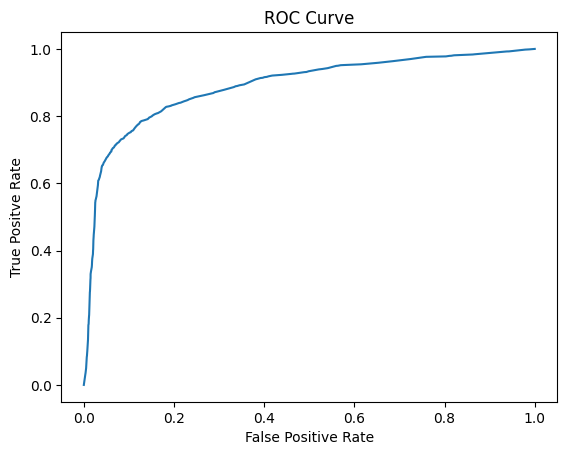

AUC ROC Score: 0.8900033550137515


In [41]:
# AUC ROC Curve
fpr, tpr, _ = roc_curve(processed_data['hospitalized'], processed_data['hospitalized_prob'])
plt.plot(fpr, tpr)
plt.ylabel("True Positve Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.show()

# AUC ROC Score
print("AUC ROC Score:", roc_auc_score(processed_data['hospitalized'], processed_data['hospitalized_prob']))

In [42]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

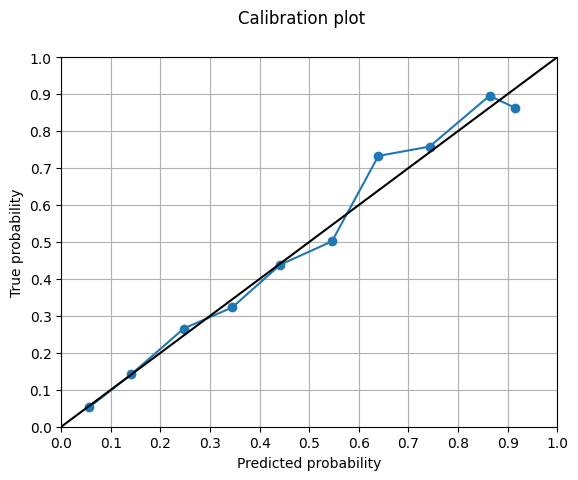

In [43]:
# Calibration curve

# Generating probability bins
prob_true, prob_pred = calibration_curve(processed_data['hospitalized'], processed_data['hospitalized_prob'], n_bins=10)

fig, ax = plt.subplots()

# Plotting calibration curve
plt.plot(prob_pred, prob_true, marker='o')

# Ideal line
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

# Labels
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability')

# View
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0, 1.01, 0.1))
plt.yticks(np.arange(0, 1.01, 0.1))
plt.grid()
plt.show()

{'pred_probs': array([0.04135336, 0.06830887, 0.13152759, 0.17370084, 0.22630933,
        0.27002896, 0.32563984, 0.37477298, 0.4209094 , 0.47502149,
        0.52471759, 0.57467878, 0.61341592, 0.66429185, 0.72018483,
        0.76897109, 0.82658672, 0.88065332, 0.91574522, 0.95519154]),
 'emp_probs': array([0.04137525, 0.06157586, 0.13560166, 0.16425287, 0.25198939,
        0.280915  , 0.29398271, 0.36815851, 0.44873669, 0.42054129,
        0.48706897, 0.52161141, 0.74084249, 0.72512056, 0.70014078,
        0.82600277, 0.87783508, 0.90377656, 0.8622825 , 0.83333333]),
 'bin_counts': array([7.9782e+04, 9.5021e+04, 5.6253e+04, 1.7400e+04, 1.3195e+04,
        1.1847e+04, 1.1334e+04, 7.2170e+03, 4.7890e+03, 2.8820e+03,
        3.2480e+03, 2.3830e+03, 2.1840e+03, 2.2810e+03, 4.2620e+03,
        3.6150e+03, 1.6093e+04, 3.4264e+04, 1.9540e+04, 6.0000e+00])}

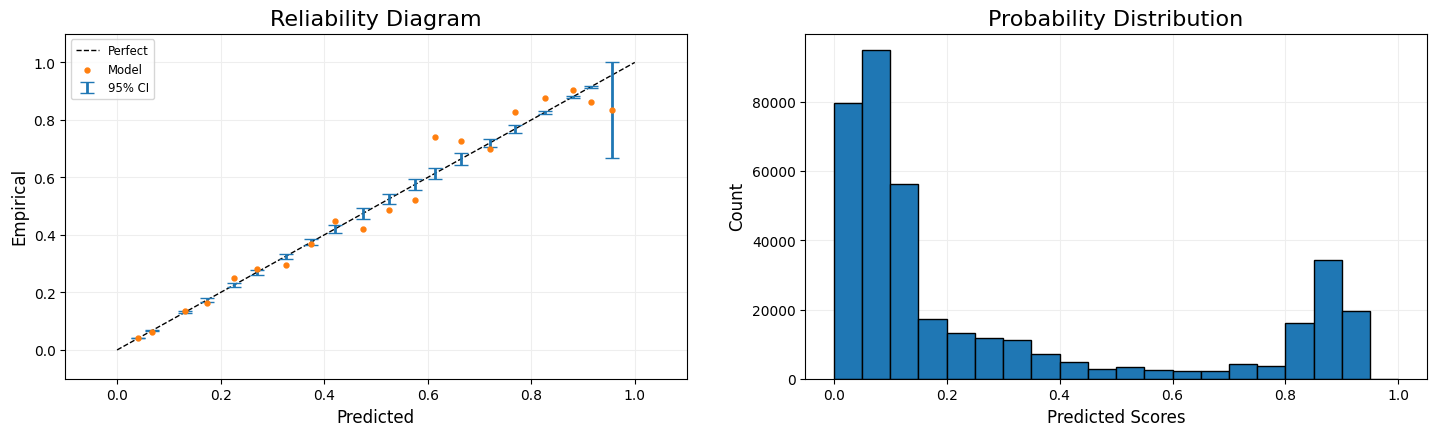

In [44]:
# Calibration curve using ML Insights and confidence intervals
plt.figure(figsize=(15,5))
mli.plot_reliability_diagram(processed_data['hospitalized'], processed_data['hospitalized_prob'],show_histogram=True)

In [45]:
# Evaluating probability predictions
print('Brier Score:', brier_score_loss(processed_data['hospitalized'], processed_data['hospitalized_prob']))
print('Log Loss:', log_loss(processed_data['hospitalized'], processed_data['hospitalized_prob']))

Brier Score: 0.1015811212292579
Log Loss: 0.3444855721119405


##Calibrating Model

In [48]:
# Importing packages
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

In [53]:
## Calibrating the model
## As I look back on this code after publishing my article I realize that the validation and test datasets were the exact same,
## meaning I fitted and predicted the calibrated classifier on the same dataset, so these calibrated predictions are overfit

# Splitting in to 80/10/10 train, validation, and test datasets
X_train_raw, X_test, y_train_raw, y_test = train_test_split(processed_data[processed_feats], processed_data['hospitalized'],
                                                            test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(processed_data[processed_feats], processed_data['hospitalized'],
                                                            test_size=0.1, shuffle=False)

# Fitting base model on train dataset
lgbm.fit(X_train, y_train)

# Creating calibrated classifier and fitting on validation set
calibrated_lgbm = CalibratedClassifierCV(lgbm, cv='prefit', method='isotonic')
calibrated_lgbm.fit(X_val, y_val)

# Generating calibrated probabilities from test dataset
calibrated_probs = calibrated_lgbm.predict_proba(X_test)[:,1]

# Evaluating calibrated probabilities
print('Brier Score:', brier_score_loss(y_test, calibrated_probs))
print('Log Loss:', log_loss(y_test, calibrated_probs))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Brier Score: 0.0380716143402353
Log Loss: 0.1535461277828349


{'pred_probs': array([0.02026706, 0.07064057, 0.11304348, 0.18181818, 0.22222222,
        0.25      , 0.3180778 , 0.53003534, 0.76109937, 0.8042328 ,
        0.87874659, 0.93877551, 1.        ]),
 'emp_probs': array([0.02026706, 0.07064057, 0.11304348, 0.18181818, 0.22222222,
        0.25      , 0.3180778 , 0.53003534, 0.76109937, 0.8042328 ,
        0.87874659, 0.93877551, 1.        ]),
 'bin_counts': array([2.9506e+04, 5.6200e+03, 4.6000e+02, 1.1000e+01, 1.8000e+01,
        4.0000e+00, 4.3700e+02, 2.8300e+02, 4.7300e+02, 3.7800e+02,
        1.4680e+03, 9.8000e+01, 4.0000e+00])}

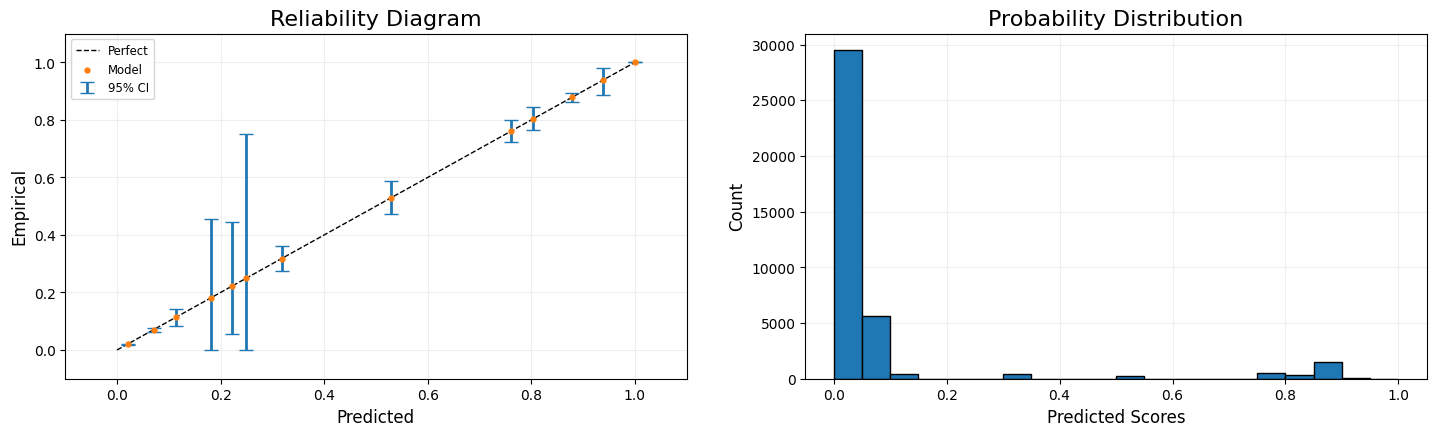

In [54]:
# Calibration plot for calibrated probabilities
plt.figure(figsize=(15,5))
mli.plot_reliability_diagram(y_test, calibrated_probs,show_histogram=True)

In [58]:
# Making copy of dataframe
new_df = X_test.copy()

# Adding hospitalized and the predictions
new_df['hospitalized'] = y_test
new_df['hospitalized_prob'] = calibrated_probs
new_df['hospitalized_pred'] = calibrated_lgbm.predict(X_test)

# Confusion matrix
confusion_matrix(new_df['hospitalized'], new_df['hospitalized_pred'])

array([[34863,   504],
       [ 1193,  2200]])

In [60]:
# Accuracy, recall, and precision scores
print('Accuracy:', (34858+2203)/(34858+509+1190+2203))
print('Recall (TPR):', recall_score(new_df['hospitalized'], new_df['hospitalized_pred']))
print('Precision:', precision_score(new_df['hospitalized'], new_df['hospitalized_pred']))

Accuracy: 0.9561661506707946
Recall (TPR): 0.6483937518420277
Precision: 0.8136094674556213


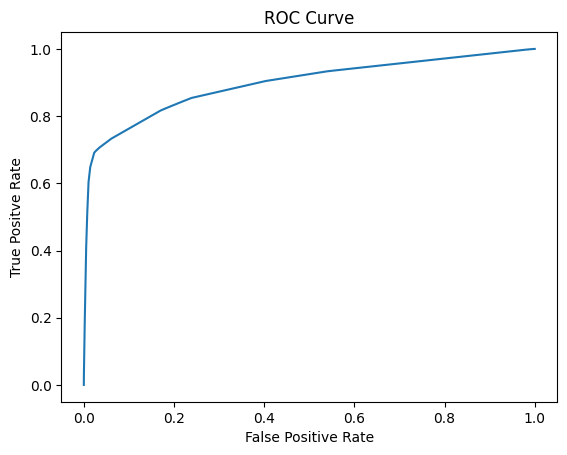

ROC AUC Score: 0.8962271914293231


In [61]:
# ROC AUC curve for calibrated probabilities
_fpr, _tpr, __ = roc_curve(new_df['hospitalized'], new_df['hospitalized_prob'])

plt.plot(_fpr, _tpr)
plt.ylabel("True Positve Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.show()

print("ROC AUC Score:", roc_auc_score(new_df['hospitalized'], new_df['hospitalized_prob']))

#Analyzing Bad Recall

In [81]:
# Feature for seeing people who didn't have any pre exisiting condition
new_df['no_condition']=0
mask = ((new_df['pneumonia_Y'] == 0) & (new_df['pregnant_Y'] == 0) & (new_df['diabetes_Y'] == 0) & (new_df['copd_Y'] == 0) &
 (new_df['asthma_Y'] == 0) & (new_df['inmsupr_Y'] == 0) & (new_df['hipertension_Y'] == 0) & (new_df['other_disease_Y'] == 0) &
  (new_df['cardiovascular_Y'] == 0) & (new_df['obesity_Y'] == 0) & (new_df['renal_chronic_Y'] == 0) & (new_df['tobacco_Y'] == 0))
new_df.loc[mask, 'no_condition']=1

# Creating dataframe for those who were hospitalized but weren't predicted to be
mask = (new_df['hospitalized'] == 1) & (new_df['hospitalized_pred'] == 0)
df_wrong = new_df[mask]

# Creating dataframe for those who were hospitalized in general
hospitalized_df = new_df[new_df['hospitalized']==1]

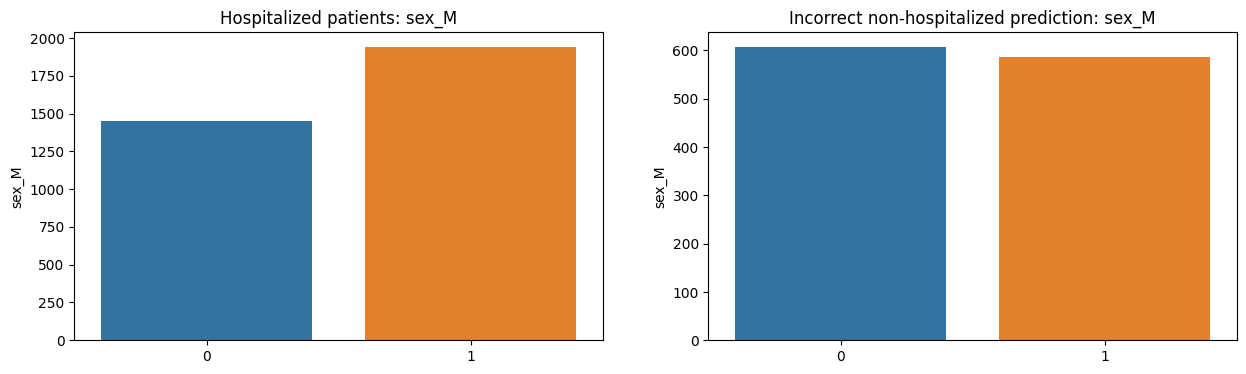

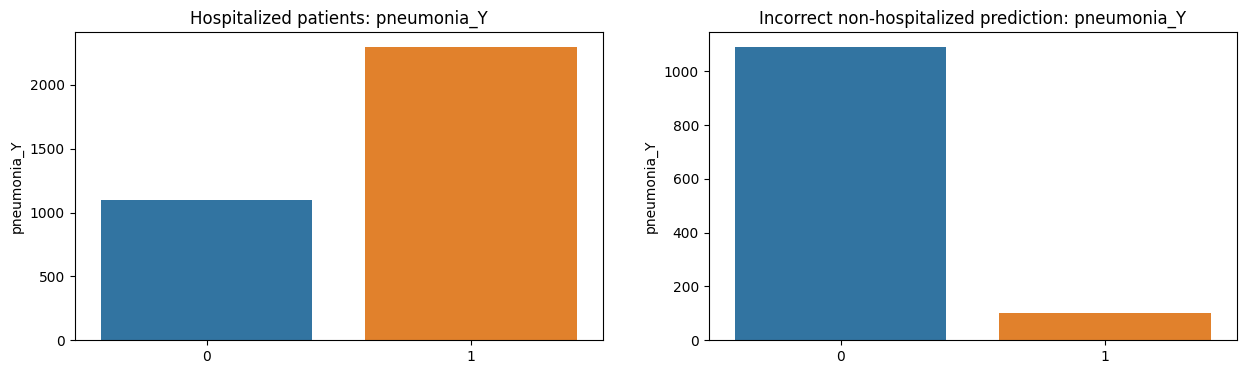

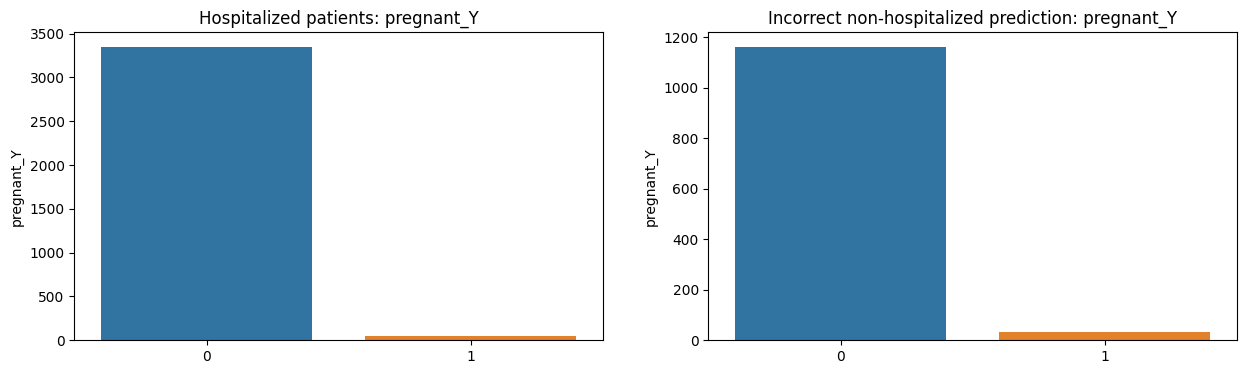

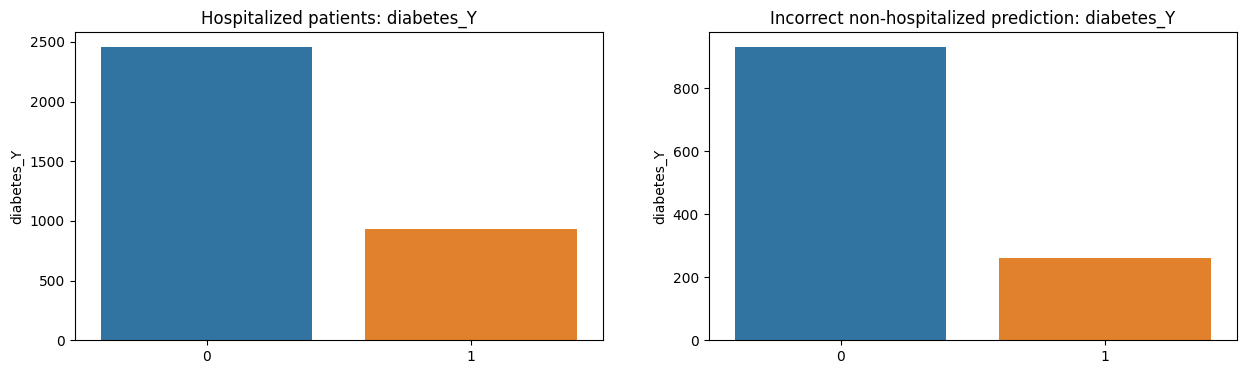

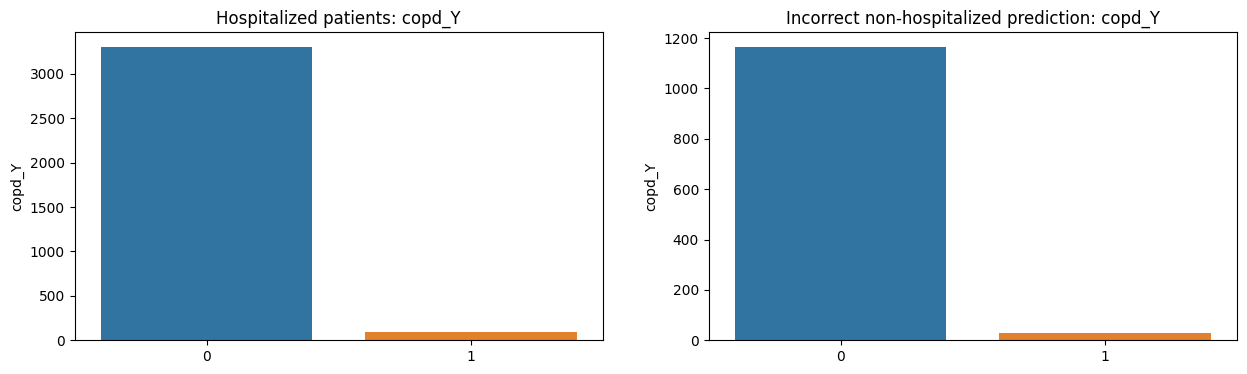

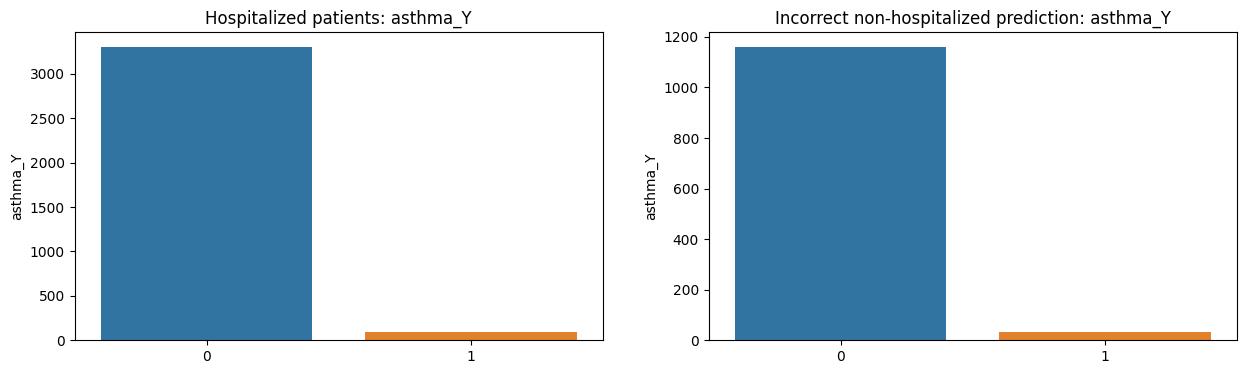

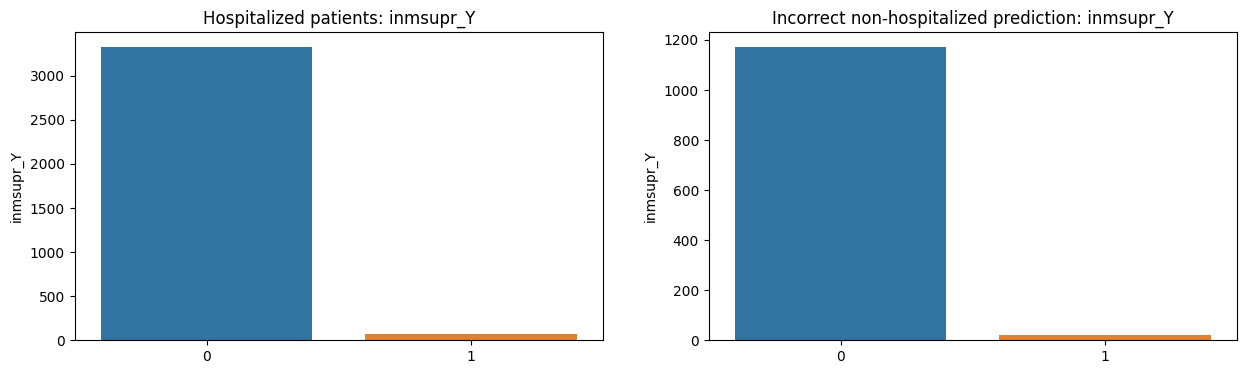

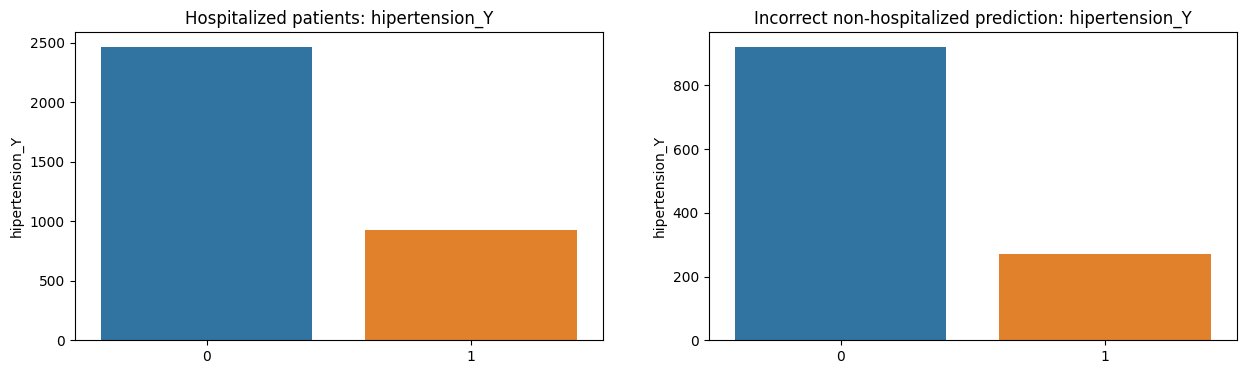

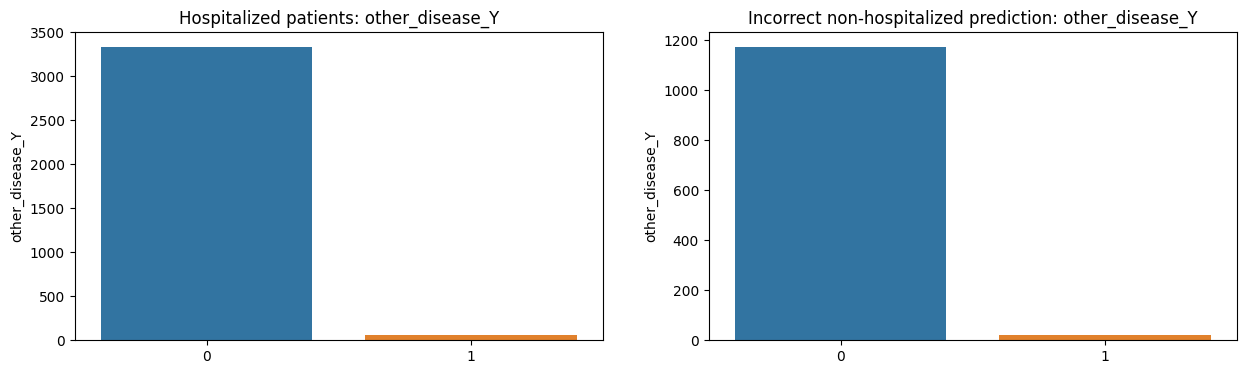

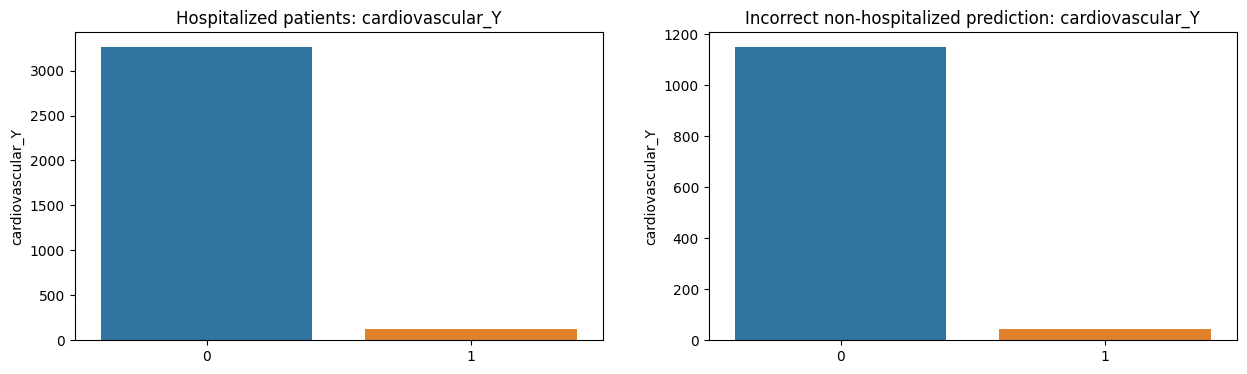

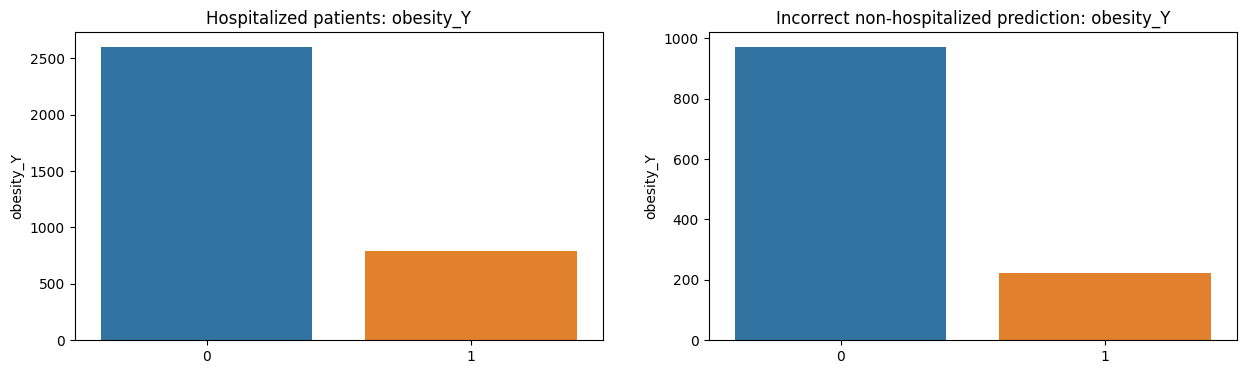

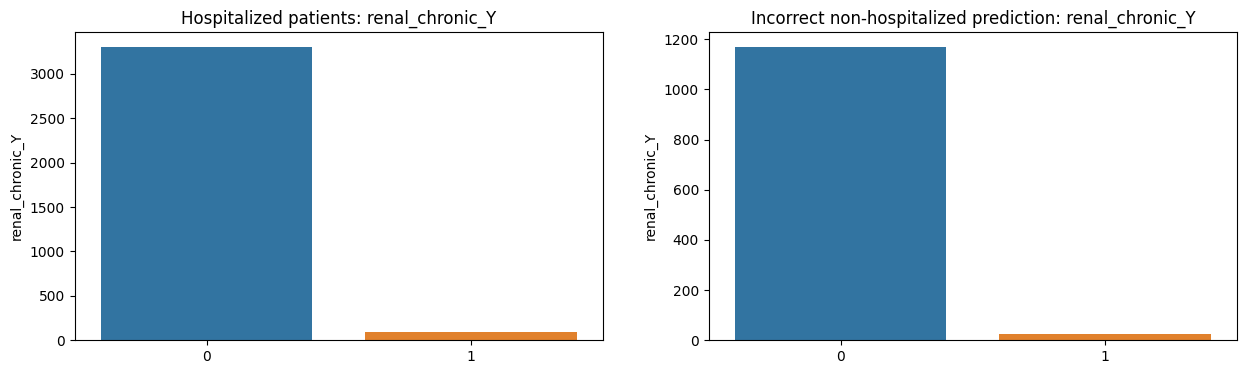

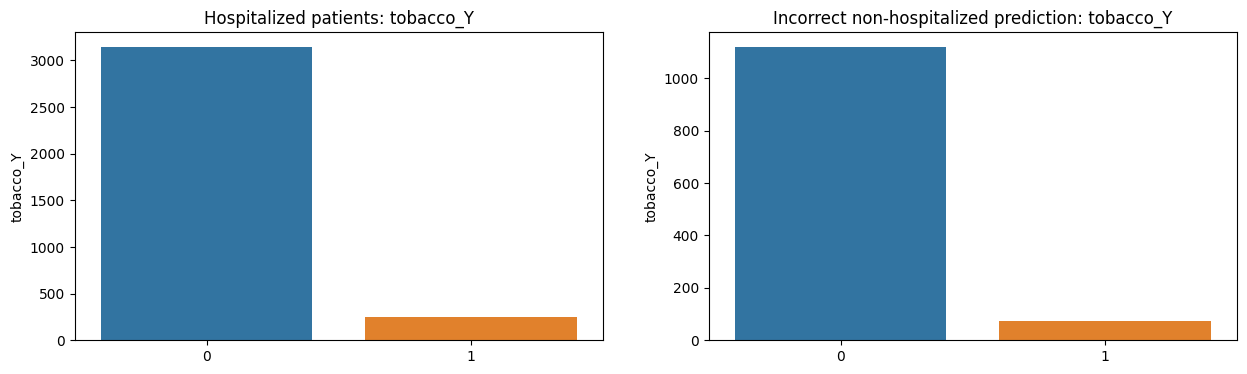

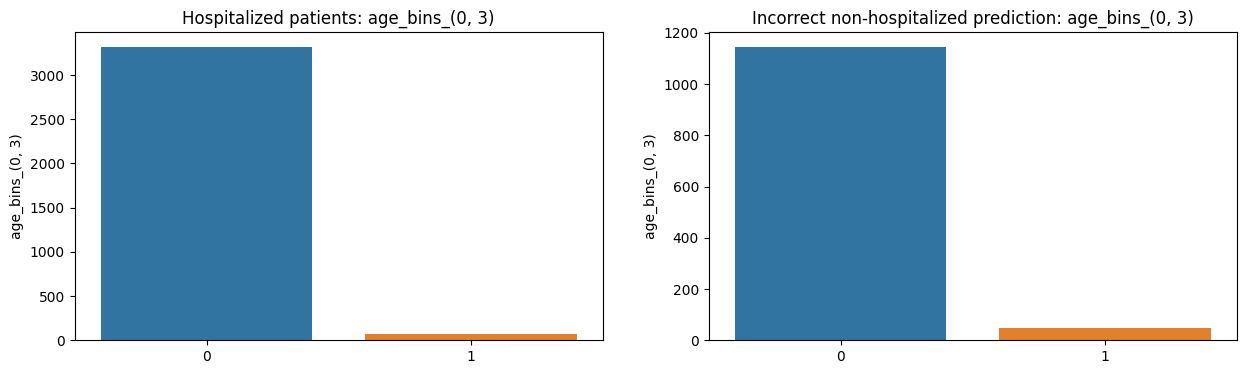

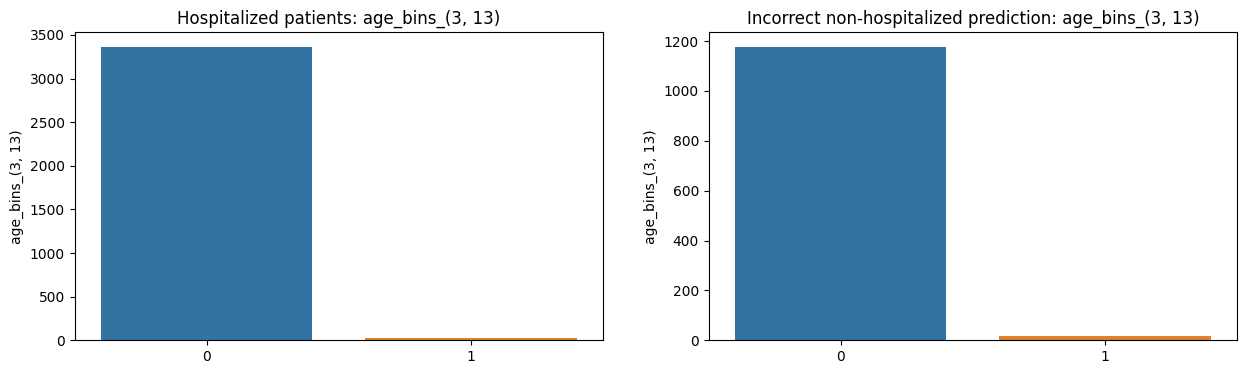

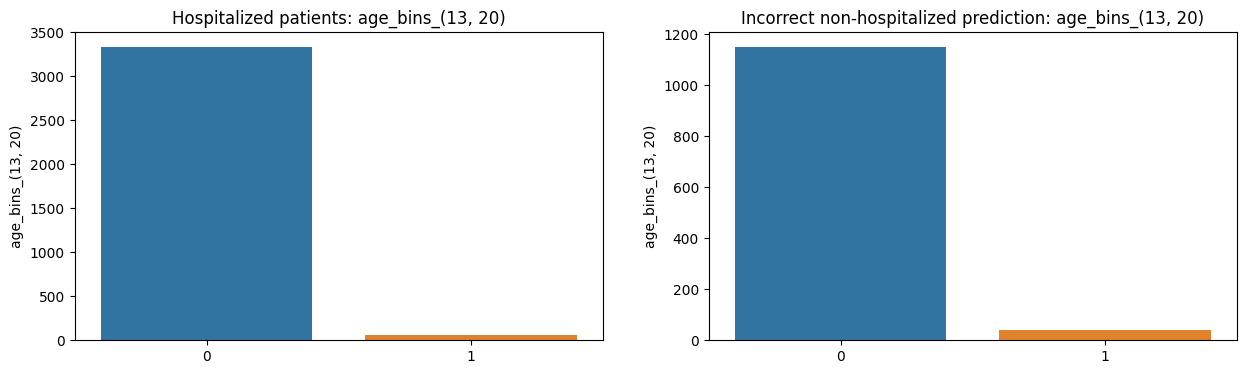

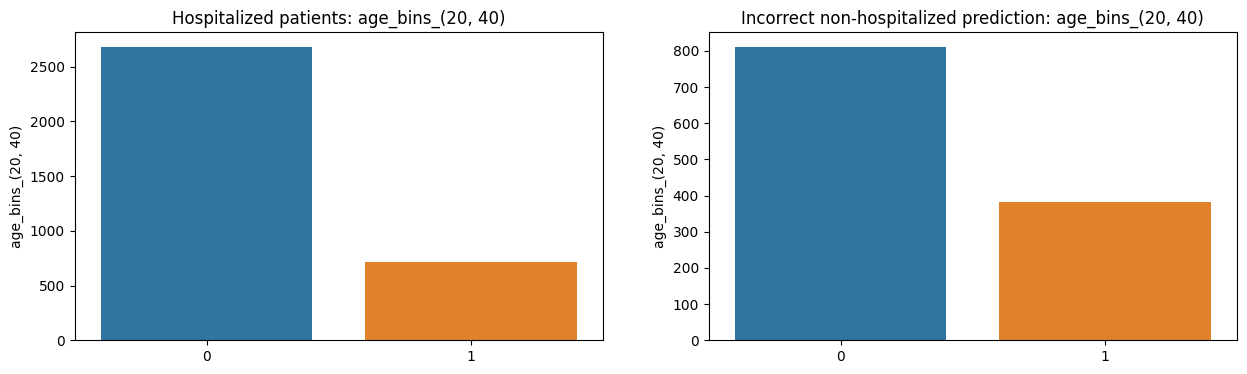

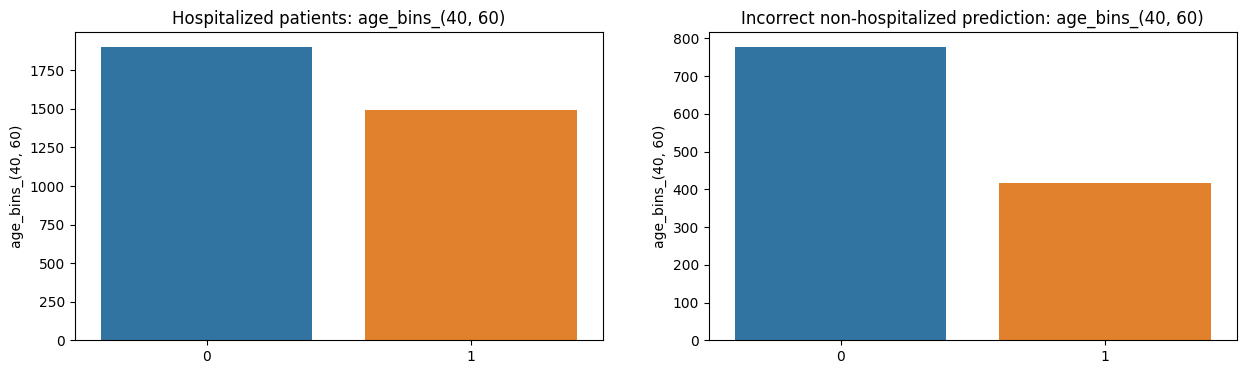

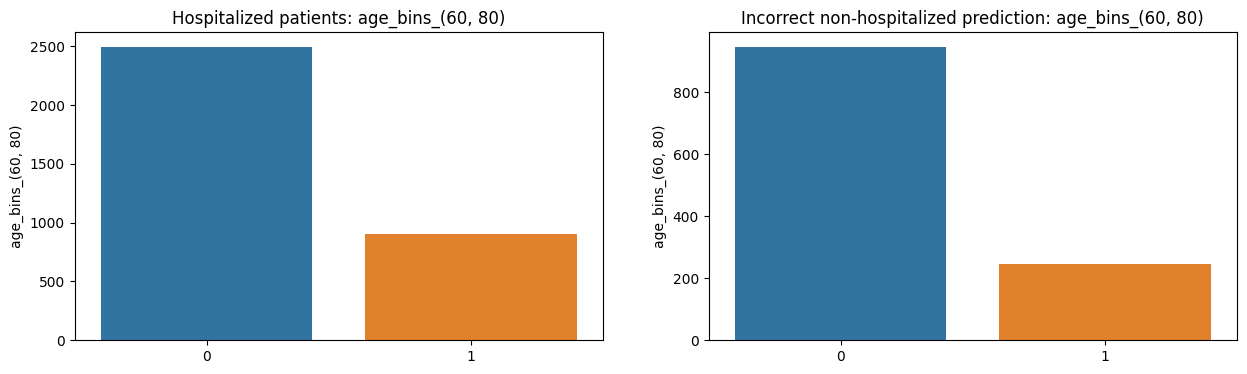

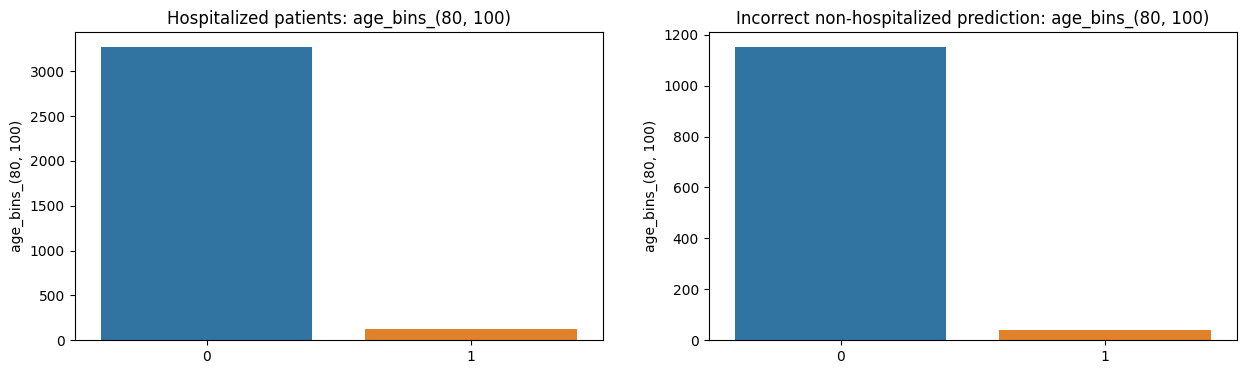

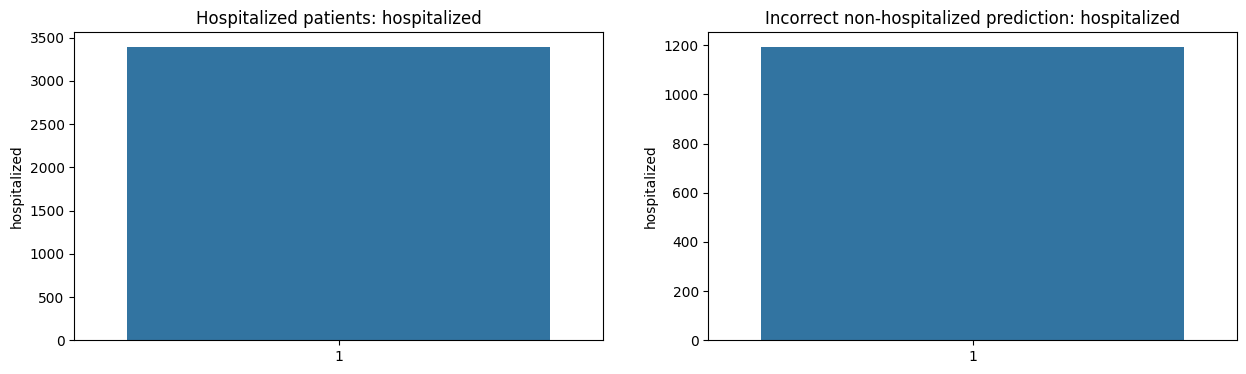

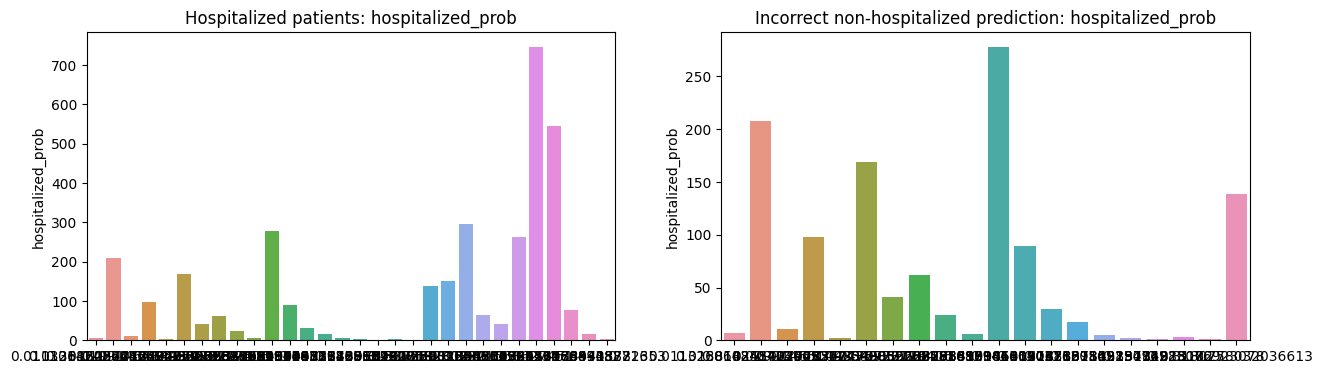

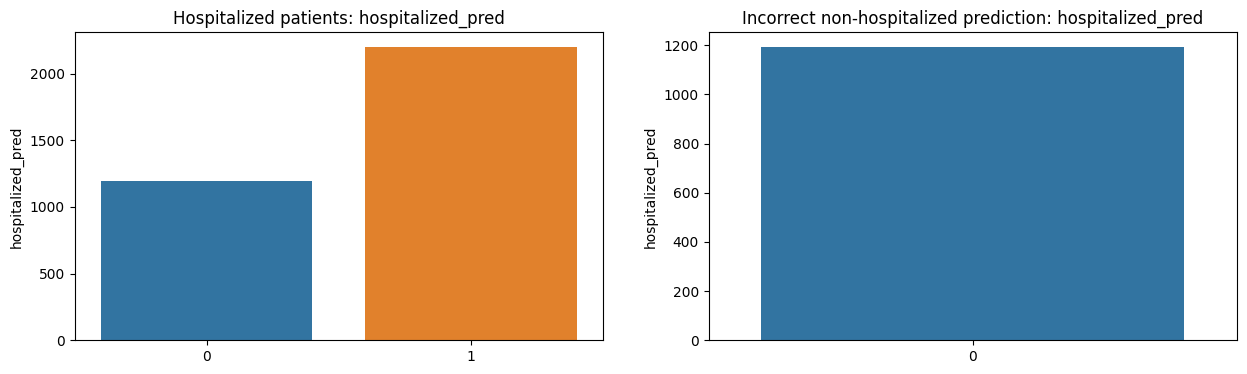

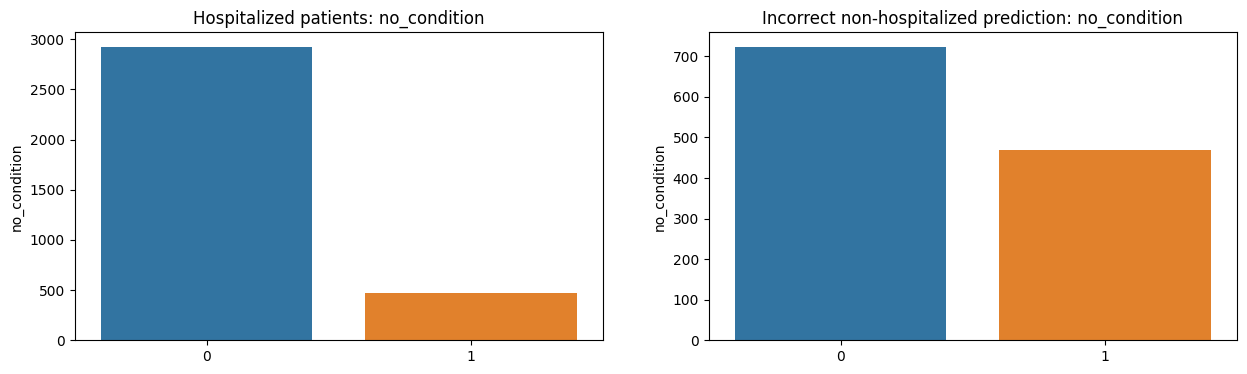

In [82]:
for x in df_wrong.columns:
  fig, ax = plt.subplots(1,2, figsize = (15,4))
  # Plotting condition frequency for hospitalized patients
  sns.barplot(x=hospitalized_df[x].value_counts().index, y=hospitalized_df[x].value_counts(), ax=ax[0]).set_title('Hospitalized patients: ' + x)
  # Plotting condition frequency for those who were not predicted to be hospitalized but were
  sns.barplot(x=df_wrong[x].value_counts().index, y=df_wrong[x].value_counts(), ax=ax[1]).set_title('Incorrect non-hospitalized prediction: ' + x)
  plt.show()

#SHAP

In [83]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.2 MB/s eta 0:00:00


In [84]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [85]:
# Creating tree explainer
explainer = shap.TreeExplainer(lgbm)

In [86]:
# Generating SHAP values for train dataset
shap_values_train = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [89]:
# Generating SHAP values for test dataset
shap_values_test = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


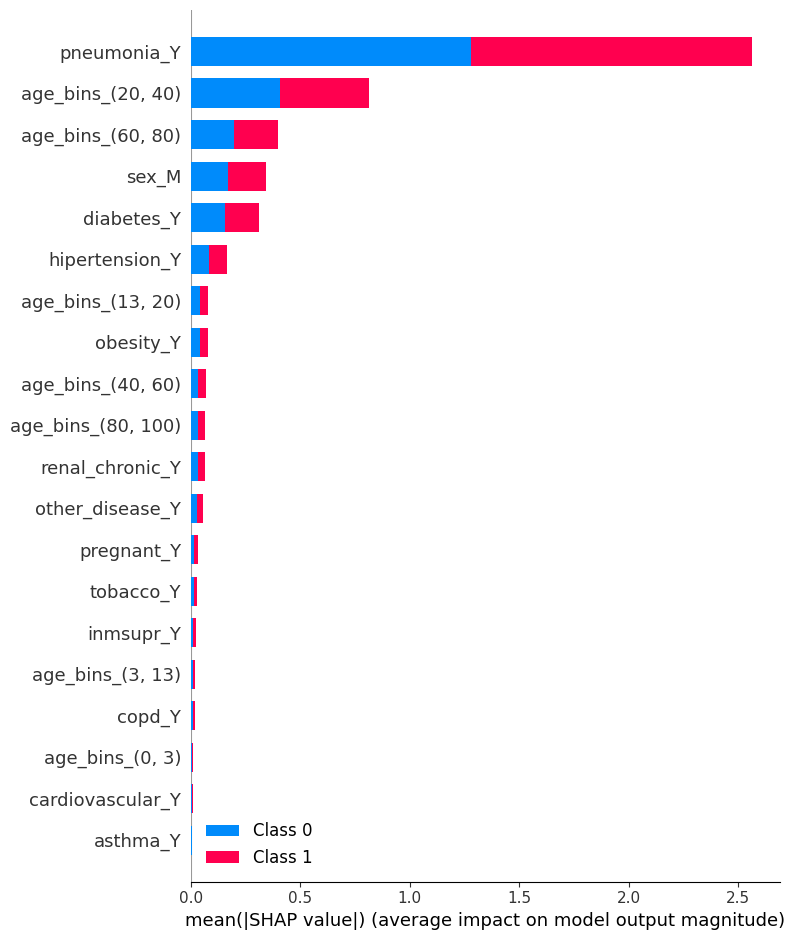

In [87]:
# SHAP bar plot for train dataset
shap.summary_plot(shap_values_train, X_train)

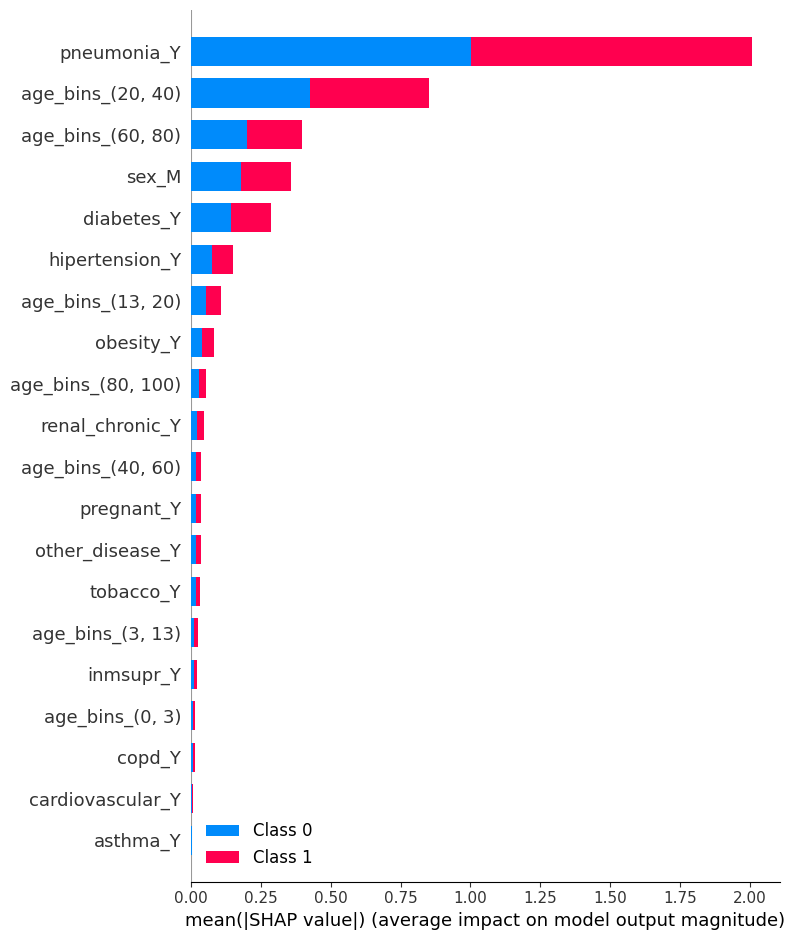

In [90]:
# SHAP bar plot for test dataset
shap.summary_plot(shap_values_test, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


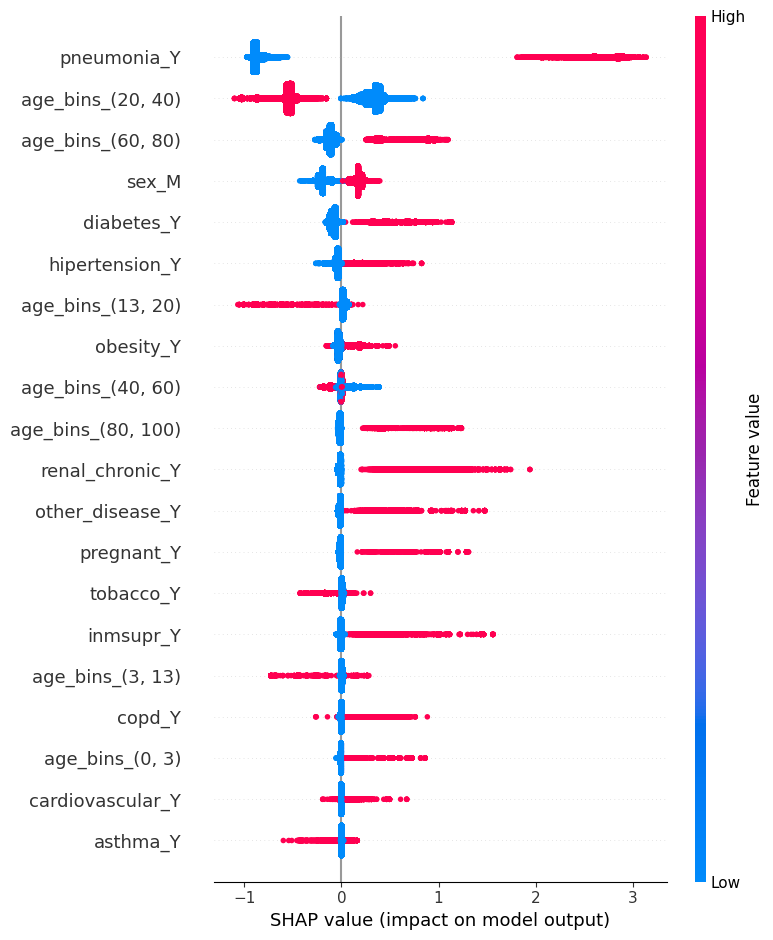

In [88]:
# SHAP beeswarm plot for train dataset for those that were hospitalized
shap.summary_plot(shap_values_train[1], X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


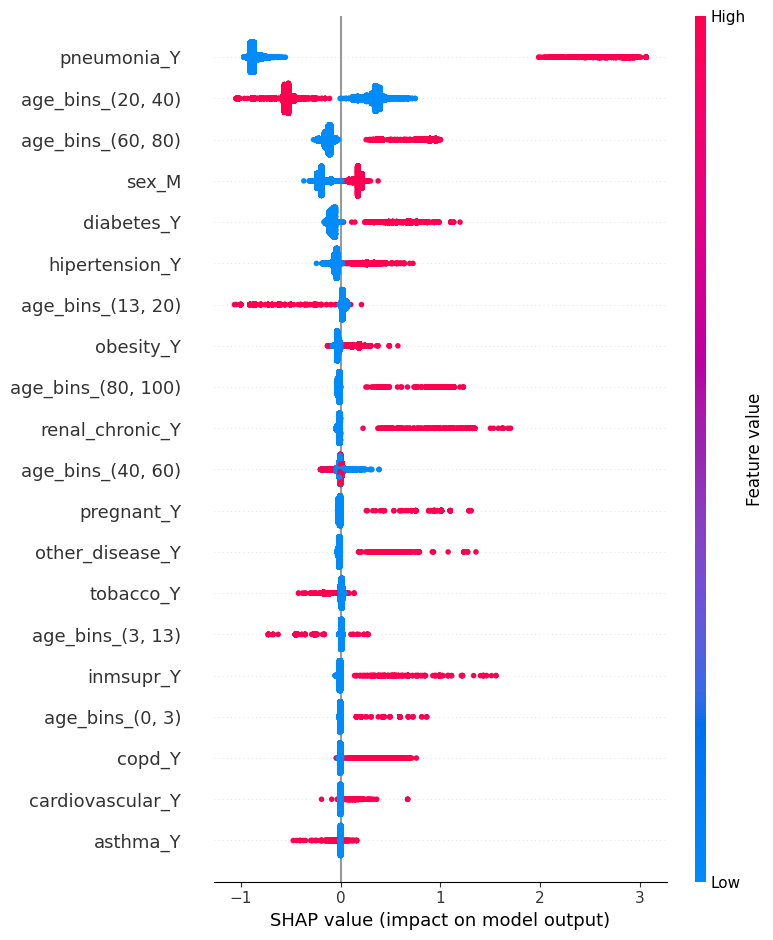

In [91]:
# SHAP beeswarm plot for test dataset for those that were hospitalized
shap.summary_plot(shap_values_test[1], X_test)